# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도

* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
* 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

In [1]:
import nltk
nltk.download("punkt")
nltk.download("wordnet")

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\master\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\master\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
def jaccard_similarity(d1, d2):
    lemmatizer = WordNetLemmatizer()

    words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
    words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

    inter = len(set(words1).intersection(set(words2)))
    union = len(set(words1).union(set(words2)))

    return inter/union

In [9]:
d1 = "We examine how people's forecasts for oil or gasoline prices influence their forecasts for broader inflation."
d2 = "How do firms mitigate the impact of rising temperatures on employment?"
d3 = "The scale of this response increases with the severity of climate disasters and is aided by credit availability and competitive labor markets."

print(jaccard_similarity(d1,d2))
print(jaccard_similarity(d1,d3))
print(jaccard_similarity(d2,d3))

0.037037037037037035
0.02857142857142857
0.06666666666666667


In [10]:
tiv = TfidfVectorizer()
corpus = [d1,d2,d3]

tfidf = tiv.fit_transform(corpus).toarray()

print(cosine_similarity(tfidf[0].reshape(1,-1), tfidf[1].reshape(1,-1)))
print(cosine_similarity(tfidf[0].reshape(1,-1), tfidf[2].reshape(1,-1)))
print(cosine_similarity(tfidf[1].reshape(1,-1), tfidf[2].reshape(1,-1)))

[[0.04189545]]
[[0.]]
[[0.14941974]]


## 한국어 형태소 분석기 설치

In [7]:
import konlpy
konlpy.__version__

'0.6.0'

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

## 데이터 전처리

* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [8]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [9]:
raw = [x.decode() for x in raw[1:10000]]

reviews = []
for i in raw:
    reviews.append(i.split('\t')[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [10]:
from konlpy.tag import Mecab

tagger = Mecab('C:/mecab/mecab-ko-dic')
reviews = [tagger.morphs(x) for x in reviews]

print(reviews[:5])

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.']]


## Word2Vec 생성

* word2vec 생성에 필요한 라이브러리들을 추가

In [11]:
import gensim
gensim.__version__

C:\Users\master\anaconda3\envs\py38\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


'4.3.2'

In [12]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
from matplotlib import rc

* `Word2Vec` 모델을 생성
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [13]:
word2vec = Word2Vec(reviews, min_count=5)
word2vec

In [14]:
word2vec.wv.most_similar('영화')

[('작품', 0.9288732409477234),
 ('듯', 0.9239480495452881),
 ('마음', 0.9051700234413147),
 ('전해', 0.8913649320602417),
 ('잔잔', 0.8894481062889099),
 ('이야기', 0.8886119723320007),
 ('순수', 0.8857257962226868),
 ('증명', 0.8850606679916382),
 ('가슴', 0.8838305473327637),
 ('모습', 0.8831253051757812)]

* t-sne을 이용한 단어 벡터 시각화

In [15]:
tsne = TSNE(n_components=2)
tsne

TSNE()

In [48]:
vocab = list(word2vec.wv.index_to_key)
similarity = word2vec.wv[vocab]
# similarity = word2vec.wv.vectors

In [49]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity)
df = pd.DataFrame(transform_similarity, index=vocab, columns=['x','y'])
df[0:10]

,x,y
.,69.675110,-4.368293
이,67.915428,-19.818850
는,71.544991,-22.103893
영화,66.268082,-18.519726
다,62.934719,-18.390343
고,57.513485,-28.632429
의,73.923134,-18.517921
하,62.006729,-29.728422
을,71.713661,-21.941988
에,70.694237,-19.414474


In [50]:
df

,x,y
.,69.675110,-4.368293
이,67.915428,-19.818850
는,71.544991,-22.103893
영화,66.268082,-18.519726
다,62.934719,-18.390343
...,...,...
최상,-62.815357,-5.067587
충실,-66.573067,-17.761181
갈망,-70.508324,-11.746155
칭찬,-73.238457,-11.998493


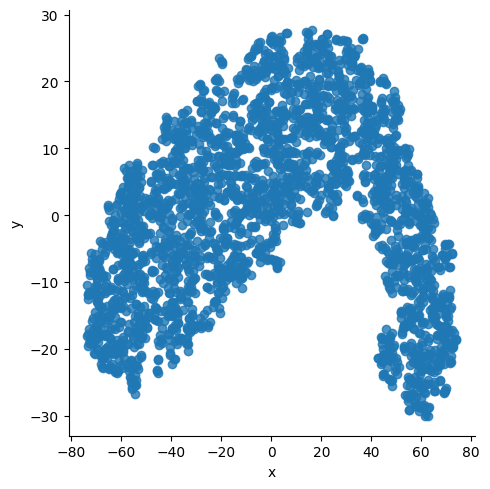

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='x', y='y', data=df, fit_reg=False)
plt.show()

## Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### Scikit-learn

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지를 지정 가능
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

* `scikit-learn` 사용 예제에서는 종료 조건 간의 차이를 비교

#### ward

In [56]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
predict = ward.fit_predict(df)
predict

array([3, 3, 3, ..., 4, 4, 4], dtype=int64)

In [57]:
results =df
results['predict'] = predict
results[0:10]

,x,y,predict
.,69.675110,-4.368293,3
이,67.915428,-19.818850,3
는,71.544991,-22.103893,3
영화,66.268082,-18.519726,3
다,62.934719,-18.390343,3
고,57.513485,-28.632429,3
의,73.923134,-18.517921,3
하,62.006729,-29.728422,3
을,71.713661,-21.941988,3
에,70.694237,-19.414474,3


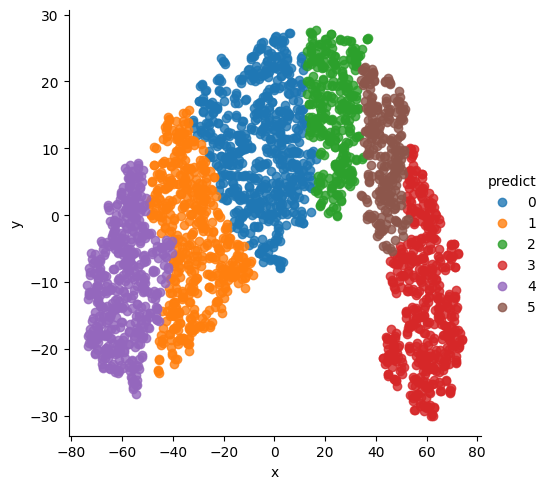

In [62]:
sns.lmplot(x='x',y='y',data=results, fit_reg=False, hue='predict')

#### average

In [63]:
avg = AgglomerativeClustering(n_clusters=6, linkage='average')
predict = avg.fit_predict(df)
results =df
results['predict'] = predict

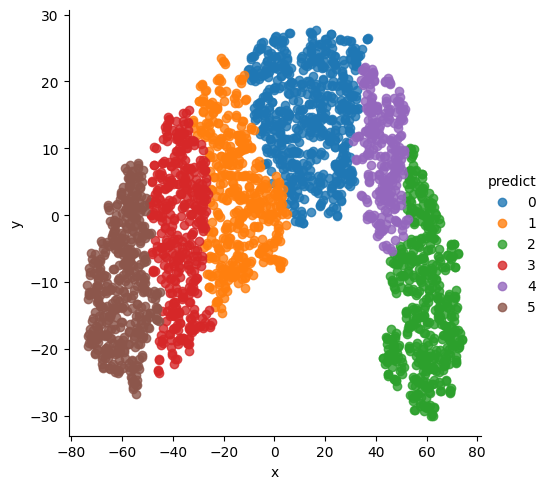

In [64]:
sns.lmplot(x='x',y='y',data=results, fit_reg=False, hue='predict')

#### complete

In [65]:
cmpl = AgglomerativeClustering(n_clusters=6, linkage='complete')
predict = cmpl.fit_predict(df)
results = df
results['predict'] = predict

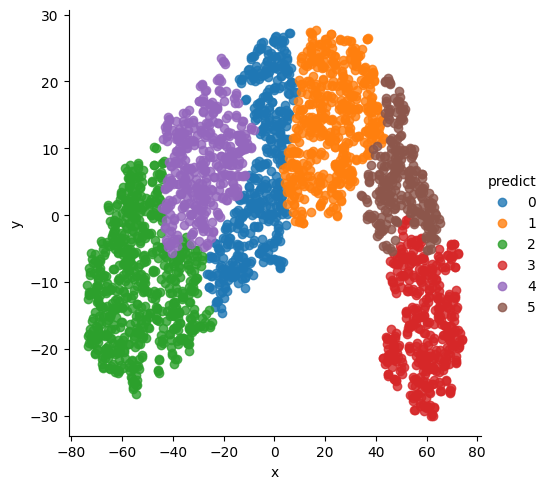

In [66]:
sns.lmplot(x='x',y='y',data=results, fit_reg=False, hue='predict')

### Scipy

* scipy를 이용한 거리 사용과 word2vec 사용을 비교

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [67]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmatrix = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,15.550440,17.833900,14.555786,15.557980,27.141360,14.773547,26.494155,17.691536,15.080657,...,97.696254,111.847315,125.663300,108.877434,139.802293,132.496086,136.908492,140.381010,143.120605,141.792333
1,15.550440,0.000000,4.288956,2.097969,5.181515,13.633767,6.146946,11.537433,4.351355,2.808077,...,95.326495,112.533171,126.008985,108.004108,138.388024,131.564197,134.507952,138.662553,141.373891,139.482102
2,17.833900,4.288956,0.000000,6.379030,9.376952,15.475947,4.302878,12.211137,0.233801,2.820772,...,99.068669,116.591858,130.025081,111.911778,142.198830,135.439798,138.189930,142.433938,145.139125,143.171930
3,14.555786,2.097969,6.379030,0.000000,3.335873,13.375714,7.655052,11.991414,6.431657,4.515686,...,93.635951,110.639669,124.142540,106.208853,136.649288,129.786341,132.847078,136.947677,139.662453,137.815974
4,15.557980,5.181515,9.376952,3.335873,0.000000,11.588361,10.989155,11.375993,9.470164,7.826810,...,90.300497,107.359381,120.845753,102.884168,133.315133,126.457809,129.513175,133.612091,136.326775,134.481607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,132.496086,131.564197,135.439798,129.786341,126.457809,122.618645,137.402061,127.238791,135.586881,134.281960,...,37.118809,23.655393,12.275532,23.644301,8.237312,0.000000,13.238116,10.187492,12.517127,14.893162
2635,136.908492,134.507952,138.189930,132.847078,129.513175,124.565872,140.501797,129.139377,138.353526,137.280902,...,39.287675,34.072069,25.154440,29.834814,9.412656,13.238116,0.000000,7.187961,8.811129,5.003052
2636,140.381010,138.662553,142.433938,136.947677,133.612091,129.134541,144.593578,133.733321,142.590491,141.414165,...,43.385121,33.593748,22.313618,31.858080,2.772087,10.187492,7.187961,0.000000,2.741770,5.490715
2637,143.120605,141.373891,145.139125,139.662453,136.326775,131.809552,147.309323,136.406051,145.296213,144.127086,...,46.080857,36.081368,24.392312,34.589266,4.370728,12.517127,8.811129,2.741770,0.000000,5.415214


* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

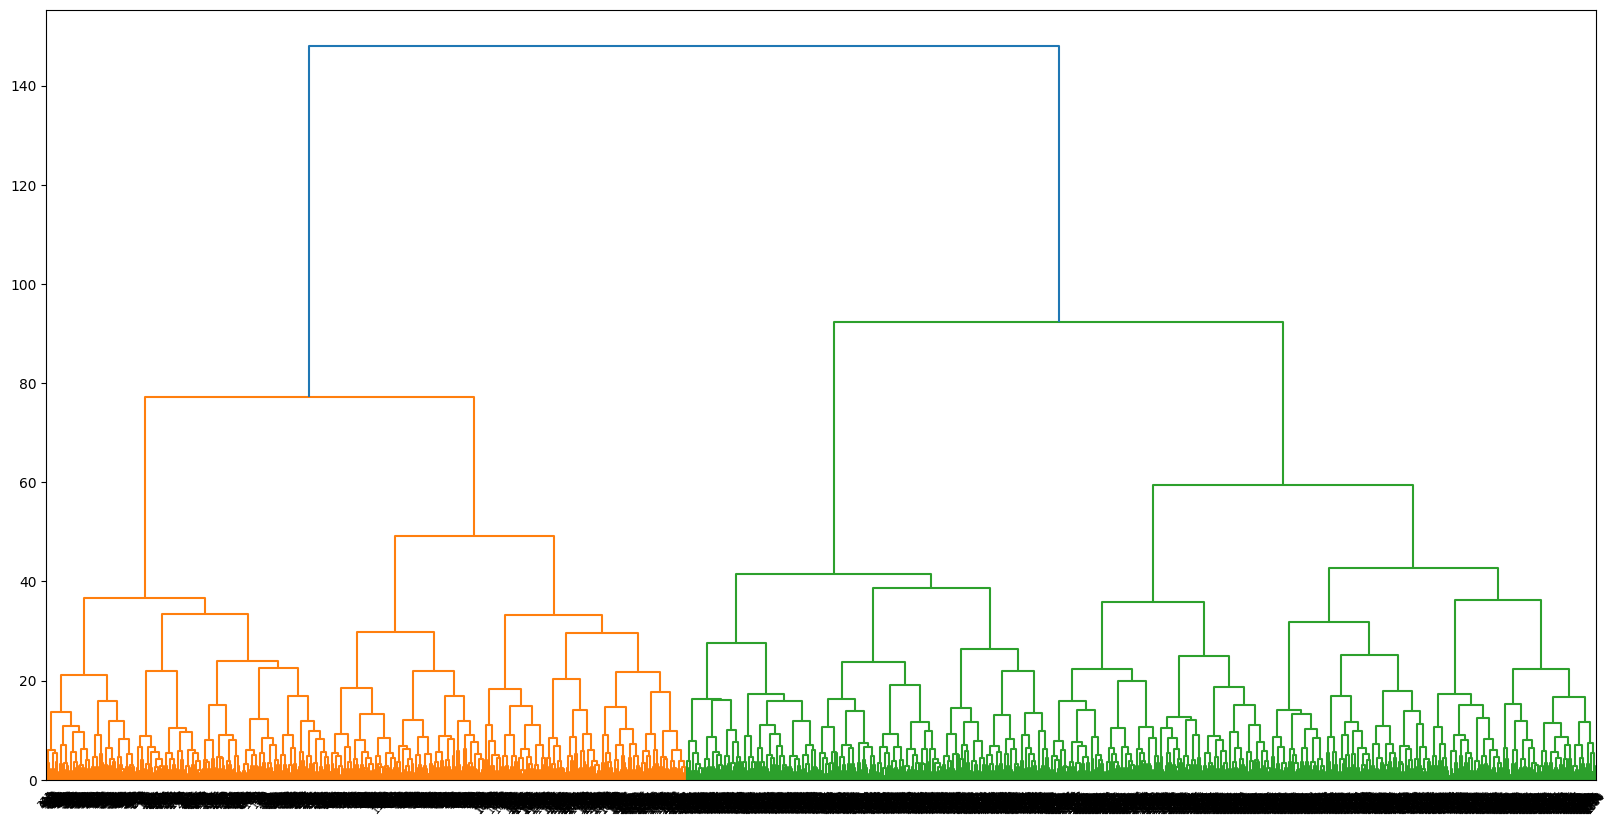

In [68]:
row_clusters = linkage(distmatrix, method='complete')

plt.figure(figsize=(20,10))
dendrogram(row_clusters, leaf_rotation=50, leaf_font_size=7)
plt.show()

* `word2vec`을 이용한 군집 분석 및 덴드로그램 시각화

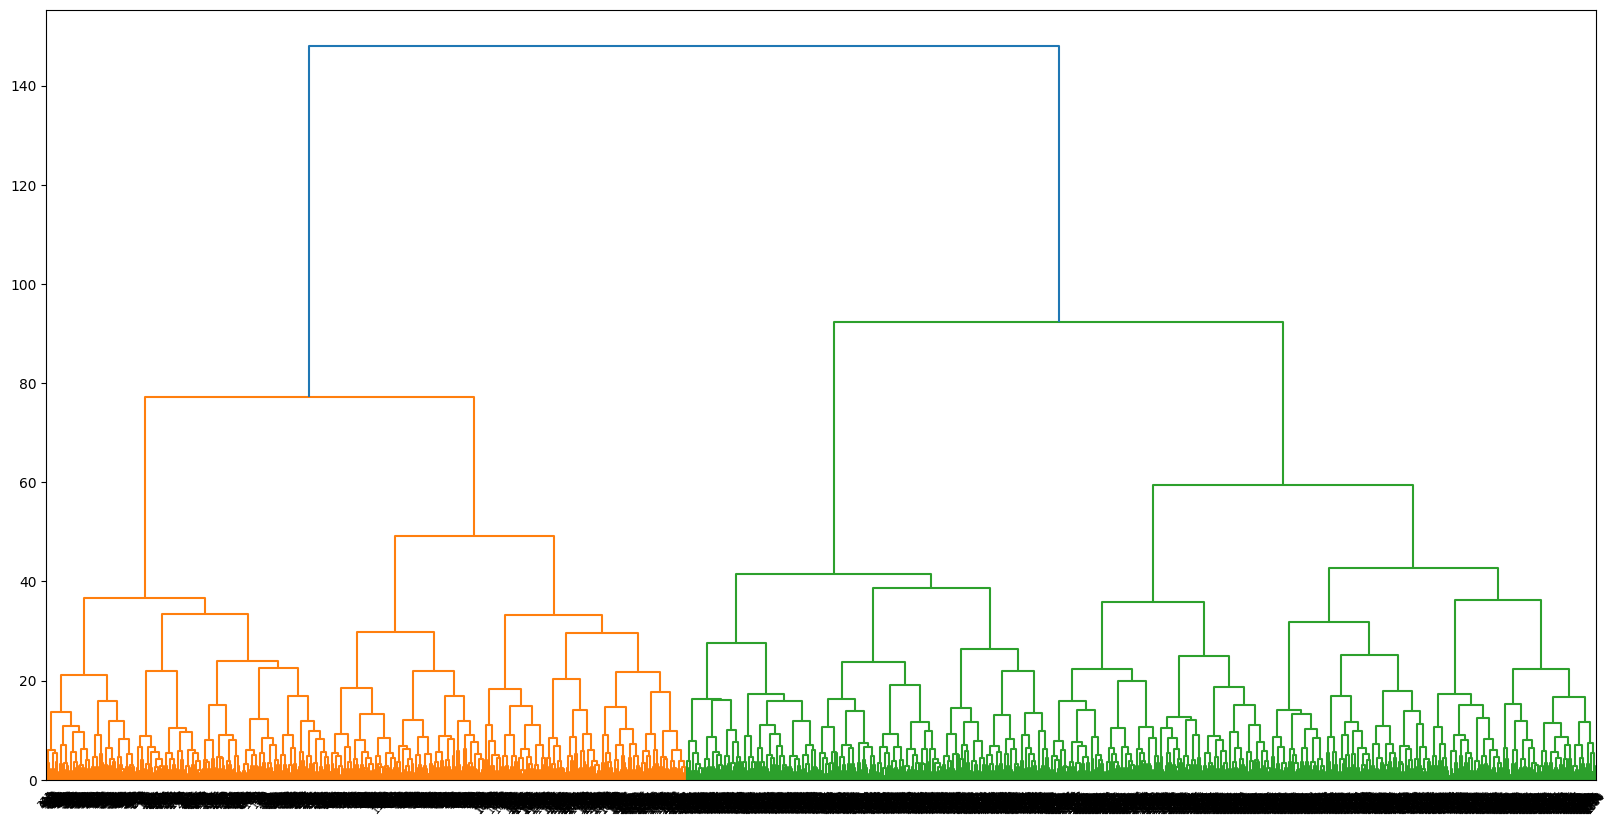

In [69]:
mergings = linkage(df, method='complete')

plt.figure(figsize=(20,10))
dendrogram(mergings, leaf_rotation=50, leaf_font_size=7)
plt.show()

## Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

In [70]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(df)
predict

C:\Users\master\anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, ..., 0, 0, 0])

In [71]:
results = df
results['predict'] = predict

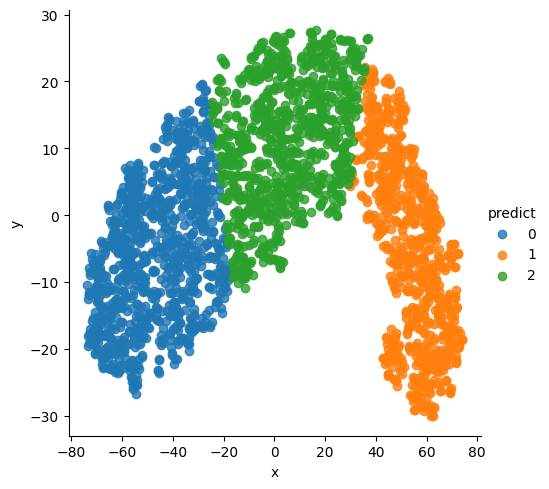

In [72]:
sns.lmplot(x='x',y='y',data=results, fit_reg=False, hue='predict')

### 클러스터 개수 6

In [75]:
kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(df)
results = df
results['predict'] = predict

C:\Users\master\anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


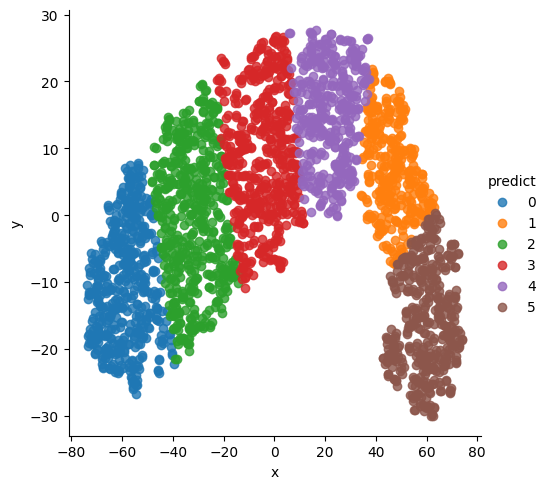

In [76]:
sns.lmplot(x='x',y='y',data=results, fit_reg=False, hue='predict')